## Creating the environement

In [8]:
import gymnasium as gym
import pygame
import numpy as np
from IPython.display import clear_output
from IPython import display
import matplotlib.pyplot as plt
import statistics
from env import SimpleCorridor

## Test Agent Function 

In [9]:
def test_agent(env: gym.Env, policy: callable, episodes: int = 10) -> None: 
    for episode in range(episodes):
        temp = env.reset()
        tagent_pos = temp[0]
        ttarget_pos = temp[1]
        done = False  
       
        env.render(mode="rgb_array")
        while not done:
            action = policy(tagent_pos, 0.1) 

            next_state, _, done, _ = env.step(action)
            env.render()
            plt.axis('off')
            display.display(plt.gcf())
            display.clear_output(wait=True)
            
            
            tagent_pos = next_state[0]

## Initialising the environment 

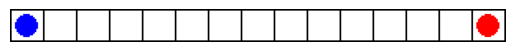

In [10]:
env = SimpleCorridor()
env.reset()
env.render()

## Q Value Table

In [11]:
action_values = np.zeros(shape=(15,2))
print(action_values)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### Creating the Policy

In [12]:
def policy(state, epsilon = 0.1):
    if np.random.random() < epsilon:
        return np.random.choice(2)
    else: 
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [13]:
action = policy(0, epsilon = 0.5)
print(f"The action taken in state 0 is {action}")

The action taken in state 0 is 0


#### Testing the policy

# Implementing the algorithm

In [16]:
def on_policy_mc_control(policy, action_values, episodes:int=1000, epsilon:int=0.1, gamma:int=0.99, alpha:int = 0.2):
    sa_returns = np.empty((15, 2), dtype=object)

    for episode in range(0, episodes + 1):
        state, target = env.reset()
        done = False
        transitions = []

        while not done:
            action = policy(state, epsilon)
            (next_state, target), reward, done, info = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        G = 0
        
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            # Specific change from normal on policy mc control 
            qsa = action_values[state_t][action_t]
            action_values[state_t][action_t] += alpha * (G - qsa)
        print(episode)



In [18]:
on_policy_mc_control(policy, action_values)

In [ ]:
test_agent(env, policy, episodes = 5)